### Explore the summary stats by plotting the histogram

In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pickle

In [52]:
data = np.load('../../../arco_sims/Arco_data_our_sumstats_v1.npz', allow_pickle=True)

x = torch.as_tensor(data['data'], dtype=torch.float32)
theta_not_standardized = torch.as_tensor(data['params'], dtype=torch.float32)

In [53]:
x = x[:,::7]

In [54]:
x_not_standardized = deepcopy(x)

In [55]:
x_mean = x.mean(dim=0)
x_std = x.std(dim=0)

x = (x-x_mean) / x_std
x = x.numpy()

### Load x_o

In [56]:
import pickle
#with open('../results/observation/x_o_new_ss.pickle', 'rb') as handle:
#    x_o = pickle.load(handle)
    
#x_o = torch.as_tensor(x_o)

x_o = torch.as_tensor(np.load('../results/observation/x_o_new_ss.npz')['x_o'], dtype=torch.float32)
x_o = x_o[::7]
x_o = (x_o - x_mean) / x_std
x_o = x_o.unsqueeze(0)
x_o = x_o.numpy()

In [57]:
x_o

array([[ 3.0685425 ,  1.0696671 ,  0.59059775, -0.418449  ,  0.07103147]],
      dtype=float32)

Minimum:   -0.5220493
Maximum:   128.73926


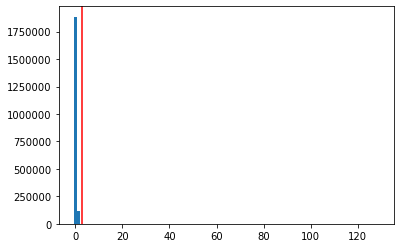

Minimum:   -0.44678465
Maximum:   111.77065


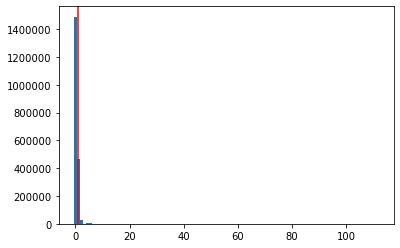

Minimum:   -0.36336255
Maximum:   138.91484


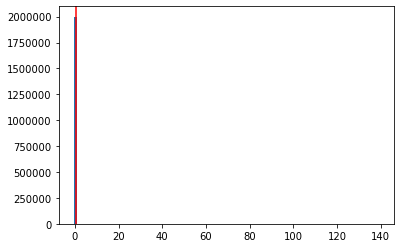

Minimum:   -0.418449
Maximum:   197.01965


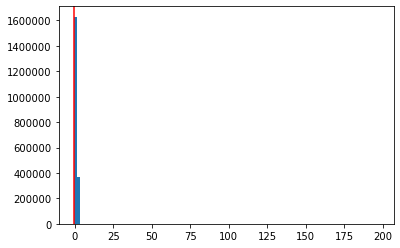

Minimum:   -0.14442958
Maximum:   38.85402


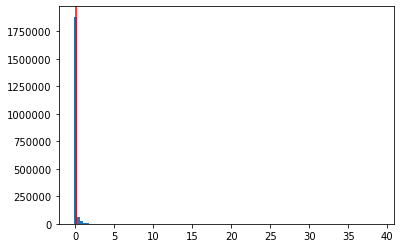

In [58]:
for i in range(5):
    print("Minimum:  ", np.min(x[:, i]))
    print("Maximum:  ", np.max(x[:, i]))
    plt.hist(x[:, i], bins=100)
    plt.axvline(x_o[0, i], color='r')
    plt.show()

## Use this to clean up the data
If a sample is larger than 10 standard deviations away from the mean -> discard it because it might break training.

In [59]:
no_value_too_large = np.all(x < 5.0, axis=1)

In [60]:
x_clear = x_not_standardized[no_value_too_large].numpy()
x_clear_standardized = x[no_value_too_large]
theta_clear = theta_not_standardized[no_value_too_large].numpy()

In [61]:
x_clear.shape

(1984680, 5)

In [62]:
no_value_too_small = np.all(x_clear_standardized > -5.0, axis=1)
x_fully_clear = x_clear[no_value_too_small]
theta_fully_clear = theta_clear[no_value_too_small]

In [63]:
x_fully_clear.shape

(1984680, 5)

In [66]:
at_least_one_spike = x_fully_clear[:,0]>0.0
x_calibrated = x_fully_clear[at_least_one_spike]
theta_calibrated = theta_fully_clear[at_least_one_spike]

In [72]:
x_calibrated.shape

(728700, 5)

In [67]:
np.savez('../results/cleaned_up_data_onlyNumSpikes_calibrationKernel.npz', data=x_calibrated, params=theta_calibrated)

### Repeat the whole analysis with the cleaned up dataset just to be sure everything worked

In [68]:
data = np.load('../results/cleaned_up_data_onlyNumSpikes_calibrationKernel.npz', allow_pickle=True)

x = torch.as_tensor(data['data'], dtype=torch.float32)
theta_not_standardized = torch.as_tensor(data['params'], dtype=torch.float32)

In [69]:
x_mean = x.mean(dim=0)
x_std = x.std(dim=0)

x = (x-x_mean) / x_std
x = x.numpy()

In [70]:
x_o = torch.as_tensor(np.load('../results/observation/x_o_new_ss.npz')['x_o'], dtype=torch.float32)
x_o = x_o[::7]

x_o = (x_o - x_mean) / x_std
x_o = x_o.unsqueeze(0)
x_o = x_o.numpy()

Minimum:   -0.42032123
Maximum:   7.7291074


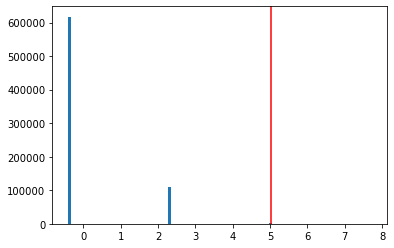

Minimum:   -1.2803866
Maximum:   3.938874


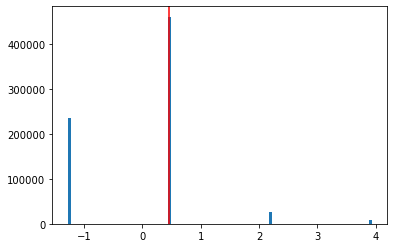

Minimum:   -16.641474
Maximum:   66.691345


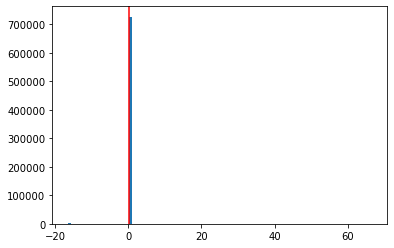

Minimum:   -0.98989505
Maximum:   2.998971


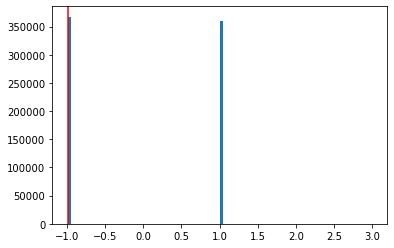

Minimum:   -0.52600574
Maximum:   10.435782


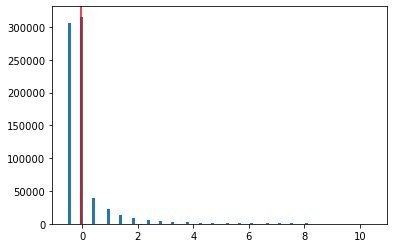

In [71]:
for i in range(5):
    print("Minimum:  ", np.min(x[:, i]))
    print("Maximum:  ", np.max(x[:, i]))
    plt.hist(x[:, i], bins=100)
    plt.axvline(x_o[0, i], color='r')
    plt.show()